<a href="https://colab.research.google.com/github/saahil-jain/Covid_19_predictor/blob/master/Cases_Deaths_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kartika/COVID-19-geographic-disbtribution-worldwide.csv' , usecols = ['countriesAndTerritories'])
ctcset = set()
for i in range(len(df.values)):
  ctcset.add(df.values[i][0])
ctclist = list(ctcset)
ctclist = ['United_States_of_America' , "France" , "Italy" ]

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kartika/COVID-19-geographic-disbtribution-worldwide.csv' , date_parser=['dateRep'])
dfs = {}
for ctc in ctclist:
  dftemp = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kartika/COVID-19-geographic-disbtribution-worldwide.csv' , date_parser=['dateRep'])
  dftemp = dftemp.loc[df['countriesAndTerritories']==ctc]
  dftemp["dateRep"] = pd.to_datetime(dftemp["dateRep"])
  dftemp = dftemp.sort_values(by="dateRep")
  dfs[ctc] = dftemp

In [0]:
dfs_cases = {}
datasets_cases = {}
dfs_deaths = {}
datasets_deaths = {}
for ctc in ctclist:
  dfs_cases[ctc] = dfs[ctc]['cases']
  datasets_cases[ctc] = dfs_cases[ctc].values
  dfs_deaths[ctc] = dfs[ctc]['deaths']
  datasets_deaths[ctc] = dfs_deaths[ctc].values
  datasets_cases[ctc] = datasets_cases[ctc].astype('float32')
  datasets_deaths[ctc] = datasets_deaths[ctc].astype('float32')



In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
for ctc in ctclist:
  datasets_cases[ctc] = np.array(datasets_cases[ctc]).reshape(-1 , 1)
  datasets_deaths[ctc] = np.array(datasets_deaths[ctc]).reshape(-1 , 1)
  datasets_cases[ctc] = scaler.fit_transform(datasets_cases[ctc])
  datasets_deaths[ctc] = scaler.fit_transform(datasets_deaths[ctc])


In [0]:
trains_cases = {}
tests_cases = {}
trains_deaths = {}
tests_deaths = {}
for ctc in ctclist:
  train_size_cases = int(len(datasets_cases[ctc]) * 0.67)
  test_size_cases = len(datasets_cases[ctc]) - train_size_cases
  trains_cases[ctc], tests_cases[ctc] = datasets_cases[ctc][0:train_size_cases], datasets_cases[ctc][train_size_cases:len(datasets_cases[ctc])]
  train_size_deaths = int(len(datasets_deaths[ctc]) * 0.67)
  test_size_deaths = len(datasets_deaths[ctc]) - train_size_deaths
  trains_deaths[ctc], tests_deaths[ctc] = datasets_deaths[ctc][0:train_size_deaths], datasets_deaths[ctc][train_size_deaths:len(datasets_deaths[ctc])]
  




In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return np.array(dataX), np.array(dataY)

In [0]:
look_back = 1
trainXs_cases = {}
trainYs_cases = {}
trainXs_deaths = {}
trainYs_deaths= {}
testXs_cases = {}
testYs_cases = {}
testXs_deaths = {}
testYs_deaths= {}
for ctc in ctclist:
  trainXs_cases[ctc], trainYs_cases[ctc] = create_dataset(trains_cases[ctc], look_back)
  testXs_cases[ctc], testYs_cases[ctc] = create_dataset(tests_cases[ctc], look_back)

  trainXs_deaths[ctc], trainYs_deaths[ctc] = create_dataset(trains_deaths[ctc], look_back)
  testXs_deaths[ctc], testYs_deaths[ctc] = create_dataset(tests_deaths[ctc], look_back)

In [0]:
for ctc in ctclist:
  trainXs_cases[ctc] = np.reshape(trainXs_cases[ctc], (trainXs_cases[ctc].shape[0], 1, trainXs_cases[ctc].shape[1]))
  testXs_cases[ctc] = np.reshape(testXs_cases[ctc], (testXs_cases[ctc].shape[0], 1, testXs_cases[ctc].shape[1]))

  trainXs_deaths[ctc] = np.reshape(trainXs_deaths[ctc], (trainXs_deaths[ctc].shape[0], 1, trainXs_deaths[ctc].shape[1]))
  testXs_deaths[ctc] = np.reshape(testXs_deaths[ctc], (testXs_deaths[ctc].shape[0], 1, testXs_deaths[ctc].shape[1]))

In [56]:
# create and fit the LSTM network
model_cases = Sequential()
model_cases.add(LSTM(4, input_shape=(1, look_back)))
model_cases.add(Dense(1))
model_cases.compile(loss='mean_squared_error', optimizer='adam')
model_cases.fit(trainXs_cases[ctc], trainYs_cases[ctc], epochs=80, batch_size=1, verbose=2)


model_deaths = Sequential()
model_deaths.add(LSTM(2, input_shape=(1, look_back)))
model_deaths.add(Dense(1))
model_deaths.compile(loss='mean_squared_error', optimizer='adam')
for ctc in ctclist:
  model_deaths.fit(trainXs_deaths[ctc], trainYs_deaths[ctc], epochs=53, batch_size=1, verbose=2)

Epoch 1/80
 - 0s - loss: 0.1276
Epoch 2/80
 - 0s - loss: 0.1058
Epoch 3/80
 - 0s - loss: 0.0903
Epoch 4/80
 - 0s - loss: 0.0789
Epoch 5/80
 - 0s - loss: 0.0694
Epoch 6/80
 - 0s - loss: 0.0610
Epoch 7/80
 - 0s - loss: 0.0523
Epoch 8/80
 - 0s - loss: 0.0439
Epoch 9/80
 - 0s - loss: 0.0356
Epoch 10/80
 - 0s - loss: 0.0279
Epoch 11/80
 - 0s - loss: 0.0211
Epoch 12/80
 - 0s - loss: 0.0154
Epoch 13/80
 - 0s - loss: 0.0111
Epoch 14/80
 - 0s - loss: 0.0080
Epoch 15/80
 - 0s - loss: 0.0060
Epoch 16/80
 - 0s - loss: 0.0048
Epoch 17/80
 - 0s - loss: 0.0042
Epoch 18/80
 - 0s - loss: 0.0038
Epoch 19/80
 - 0s - loss: 0.0037
Epoch 20/80
 - 0s - loss: 0.0037
Epoch 21/80
 - 0s - loss: 0.0036
Epoch 22/80
 - 0s - loss: 0.0036
Epoch 23/80
 - 0s - loss: 0.0036
Epoch 24/80
 - 0s - loss: 0.0036
Epoch 25/80
 - 0s - loss: 0.0036
Epoch 26/80
 - 0s - loss: 0.0036
Epoch 27/80
 - 0s - loss: 0.0035
Epoch 28/80
 - 0s - loss: 0.0035
Epoch 29/80
 - 0s - loss: 0.0035
Epoch 30/80
 - 0s - loss: 0.0036
Epoch 31/80
 - 0s -

In [0]:
trainPredicts_cases = {}
testPredicts_cases = {}
trainPredicts_deaths = {}
testPredicts_deaths = {}
trainScores_cases = {}
trainScores_deaths = {}
for ctc in ctclist:
  trainPredicts_cases[ctc] = model_cases.predict(trainXs_cases[ctc])
  testPredicts_cases[ctc] = model_cases.predict(testXs_cases[ctc])

  trainPredicts_cases[ctc] = scaler.inverse_transform(trainPredicts_cases[ctc])
  trainYs_cases[ctc] = scaler.inverse_transform(trainYs_cases[ctc])
  testPredicts_cases[ctc] = scaler.inverse_transform(testPredicts_cases[ctc])
  testYs_cases[ctc] = scaler.inverse_transform(testYs_cases[ctc])

  # trainScores_cases[ctc] = math.sqrt(mean_squared_error(trainYs_cases[ctc][0], trainPredicts_cases[ctc][:,0]))
  # print('CASES')
  # print('Train Score: %.2f RMSE' % (trainScores_cases[ctc]))
  # testScores_cases = math.sqrt(mean_squared_error(testYs_cases[ctc][0], testPredicts_cases[ctc][:,0]))
  # print('Test Score: %.2f RMSE' % (testScores_cases[ctc]))


  trainPredicts_deaths[ctc] = model_deaths.predict(trainXs_deaths[ctc])
  testPredicts_deaths[ctc] = model_deaths.predict(testXs_deaths[ctc])

  trainPredicts_deaths[ctc] = scaler.inverse_transform(trainPredicts_deaths[ctc])
  trainYs_deaths[ctc] = scaler.inverse_transform(trainYs_deaths[ctc])
  testPredicts_deaths[ctc] = scaler.inverse_transform(testPredicts_deaths[ctc])
  testYs_deaths[ctc] = scaler.inverse_transform(testYs_deaths[ctc])

  # trainScores_deaths[ctc] = math.sqrt(mean_squared_error(trainYs_deaths[ctc][0], trainPredicts_deaths[ctc][:,0]))

  # print('DEATHS')
  # print('Train Score: %.2f RMSE' % (trainScores_deaths[ctc]))
  # testScores_deaths[ctc] = math.sqrt(mean_squared_error(testYs_deaths[ctc][0], testPredicts_deaths[ctc][:,0]))
  # print('Test Score: %.2f RMSE' % (testScores_deaths[ctc]))


In [0]:
# trainPredict_cases = model_cases.predict(trainX_cases)
# testPredict_cases = model_cases.predict(testX_cases)
# # invert predictions
# trainPredict_cases = scaler.inverse_transform(trainPredict_cases)
# trainY_cases = scaler.inverse_transform([trainY_cases])
# testPredict_cases = scaler.inverse_transform(testPredict_cases)
# testY_cases = scaler.inverse_transform([testY_cases])
# # calculate root mean squared error
# trainScore_cases = math.sqrt(mean_squared_error(trainY_cases[0], trainPredict_cases[:,0]))
# print('CASES')
# print('Train Score: %.2f RMSE' % (trainScore_cases))
# testScore_cases = math.sqrt(mean_squared_error(testY_cases[0], testPredict_cases[:,0]))
# print('Test Score: %.2f RMSE' % (testScore_cases))


# trainPredict_deaths = model_deaths.predict(trainX_deaths)
# testPredict_deaths = model_deaths.predict(testX_deaths)
# # invert predictions
# trainPredict_deaths = scaler.inverse_transform(trainPredict_deaths)
# trainY_deaths = scaler.inverse_transform([trainY_deaths])
# testPredict_deaths = scaler.inverse_transform(testPredict_deaths)
# testY_deaths = scaler.inverse_transform([testY_deaths])
# # calculate root mean squared error
# trainScore_deaths = math.sqrt(mean_squared_error(trainY_deaths[0], trainPredict_deaths[:,0]))
# print('DEATHS')
# print('Train Score: %.2f RMSE' % (trainScore_deaths))
# testScore_deaths = math.sqrt(mean_squared_error(testY_deaths[0], testPredict_deaths[:,0]))
# print('Test Score: %.2f RMSE' % (testScore_deaths))

United_States_of_America


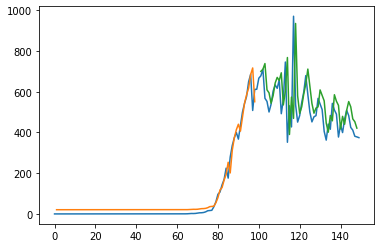

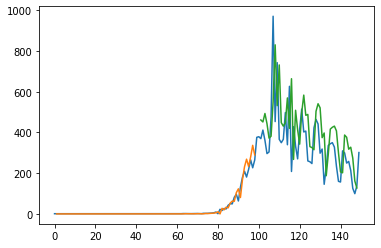

France


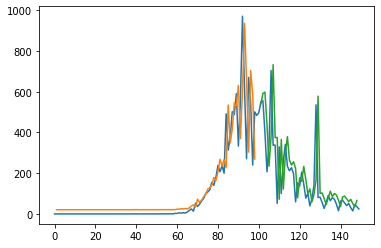

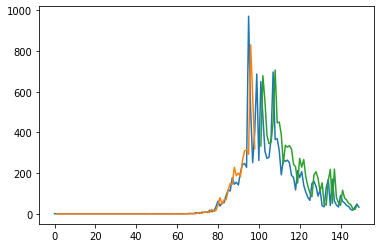

Italy


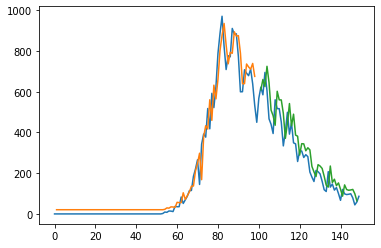

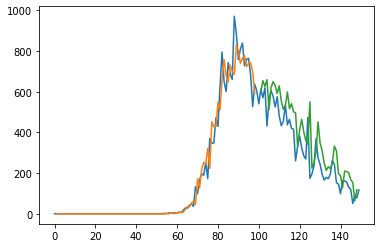

In [61]:
for ctc in ctclist:
  print(ctc)
  # shift train predictions for plotting
  trainPredictPlot_cases = np.empty_like(datasets_cases[ctc])
  trainPredictPlot_cases[:, :] = np.nan
  trainPredictPlot_cases[look_back:len(trainPredicts_cases[ctc])+look_back, :] = trainPredicts_cases[ctc]
  # shift test predictions for plotting
  testPredictPlot_cases = np.empty_like(datasets_cases[ctc])
  testPredictPlot_cases[:, :] = np.nan
  testPredictPlot_cases[len(trainPredicts_cases[ctc])+(look_back*2)+1:len(datasets_cases[ctc])-1, :] = testPredicts_cases[ctc]
  # plot baseline and predictions
  plt.plot(scaler.inverse_transform(datasets_cases[ctc]))
  plt.plot(trainPredictPlot_cases)
  plt.plot(testPredictPlot_cases)
  plt.show()


  # shift train predictions for plotting
  trainPredictPlot_deaths = np.empty_like(datasets_deaths[ctc])
  trainPredictPlot_deaths[:, :] = np.nan
  trainPredictPlot_deaths[look_back:len(trainPredicts_deaths[ctc])+look_back, :] = trainPredicts_deaths[ctc]
  # shift test predictions for plotting
  testPredictPlot_deaths = np.empty_like(datasets_deaths[ctc])
  testPredictPlot_deaths[:, :] = np.nan
  testPredictPlot_deaths[len(trainPredicts_deaths[ctc])+(look_back*2)+1:len(datasets_deaths[ctc])-1, :] = testPredicts_deaths[ctc]
  # plot baseline and predictions
  plt.plot(scaler.inverse_transform(datasets_deaths[ctc]))
  plt.plot(trainPredictPlot_deaths)
  plt.plot(testPredictPlot_deaths)
  plt.show()

In [0]:
# # shift train predictions for plotting
# trainPredictPlot_cases = np.empty_like(dataset_cases)
# trainPredictPlot_cases[:, :] = np.nan
# trainPredictPlot_cases[look_back:len(trainPredict_cases)+look_back, :] = trainPredict_cases
# # shift test predictions for plotting
# testPredictPlot_cases = np.empty_like(dataset_cases)
# testPredictPlot_cases[:, :] = np.nan
# testPredictPlot_cases[len(trainPredict_cases)+(look_back*2)+1:len(dataset_cases)-1, :] = testPredict_cases
# # plot baseline and predictions
# plt.plot(scaler.inverse_transform(dataset_cases))
# plt.plot(trainPredictPlot_cases)
# plt.plot(testPredictPlot_cases)
# plt.show()


# # shift train predictions for plotting
# trainPredictPlot_deaths = np.empty_like(dataset_deaths)
# trainPredictPlot_deaths[:, :] = np.nan
# trainPredictPlot_deaths[look_back:len(trainPredict_deaths)+look_back, :] = trainPredict_deaths
# # shift test predictions for plotting
# testPredictPlot_deaths = np.empty_like(dataset_deaths)
# testPredictPlot_deaths[:, :] = np.nan
# testPredictPlot_deaths[len(trainPredict_deaths)+(look_back*2)+1:len(dataset_deaths)-1, :] = testPredict_deaths
# # plot baseline and predictions
# plt.plot(scaler.inverse_transform(dataset_deaths))
# plt.plot(trainPredictPlot_deaths)
# plt.plot(testPredictPlot_deaths)
# plt.show()